In [19]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

실습에서 진행했던 거와 마찬가지로 house_price.csv를 불러오고,
MEDV에서 파생된 칼럼인 CAT.MEDV은 drop하기

In [3]:
data = pd.read_csv('house_price.csv')
data.drop(labels=['CAT.MEDV'], axis=1, inplace=True)

In [4]:
X = data.drop(labels='MEDV', axis=1) # 집값 컬럼을 제외하고, 데이터프레임 형태로 변환
y = data['MEDV'] # 집값 컬럼만을 데이터프레임 형태로 변환

## 다중공선성 확인하기

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


VIF가 가장 높은 PTRATIO 삭제하기

In [6]:
vif(X.drop('PTRATIO', axis=1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


NOX 삭제해보기

In [7]:
vif(X.drop(['PTRATIO','NOX'], axis=1))

   Features        VIF
0      CRIM   2.097537
1        ZN   2.449661
2     INDUS  13.150904
3      CHAS   1.138277
4        RM  41.406746
5       AGE  19.889623
6       DIS  12.032952
7       RAD  15.155012
8       TAX  57.720347
9         B  18.396072
10    LSTAT   9.207840


TAX 삭제해보기

In [8]:
vif(X.drop(['PTRATIO','TAX', 'NOX'], axis=1))

  Features        VIF
0     CRIM   2.097466
1       ZN   2.375219
2    INDUS   9.290080
3     CHAS   1.118613
4       RM  39.069063
5      AGE  19.780944
6      DIS  11.817803
7      RAD   4.965633
8        B  18.289917
9    LSTAT   9.046248


RM 삭제해보기

In [9]:
vif(X.drop(['PTRATIO','TAX', 'NOX', 'RM'], axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


### 모델 훈련하기

In [10]:
X.drop(['PTRATIO','TAX', 'NOX', 'RM'], axis=1, inplace = True)

훈련 데이터와 테스트 데이터 나누기

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 2025)

상수항 추가하기

In [12]:
X_train = sm.add_constant(X_train)

In [13]:
model = sm.OLS(y_train, X_train)
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     76.24
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.03e-80
Time:                        01:36:14   Log-Likelihood:                -1265.8
No. Observations:                 404   AIC:                             2552.
Df Residuals:                     394   BIC:                             2592.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0537      2.408     17.049      0.0

p-value가 0.05가 넘어가는 AGE, RAD, B 칼럼 삭제하고, 모델 훈련하기

In [14]:
model = sm.OLS(y_train, X_train.drop(labels=['AGE', 'RAD', 'B'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     114.7
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.66e-83
Time:                        01:36:27   Log-Likelihood:                -1266.4
No. Observations:                 404   AIC:                             2547.
Df Residuals:                     397   BIC:                             2575.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9665      1.338     32.116      0.0

### 테스트 실행하기

In [15]:
X_test = sm.add_constant(X_test)
y_test_pred = model_trained.predict(X_test.drop(['AGE', 'RAD', 'B'], axis=1))
y_test_pred

428    14.537780
237    29.115458
120    19.471100
372    30.825746
74     25.532768
         ...    
346    14.931139
84     23.930834
326    25.119641
386     7.262333
256    36.660988
Length: 102, dtype: float64

In [16]:
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'R^2: {r2_score(y_test, y_test_pred)}')

MSE: 31.540971477616445
MAE: 4.323155359717776
R^2: 0.6232093326630168


이 회귀모델은 TEST 데이터에 대해 62퍼센트 정도의 설명력을 가지고 있다.<BR>
실습파일에서의 R score보다 더 높으나, MSE와 MAE 역시 실습파일와 비슷한 값을 보여주고 있다.

R square, MSE, MAE만으로는 예측값과 데이터값의 차이에 대해서 잘 실감이 안나는 것 같아서 (GPT의 도움을 받아ㅎ) 그래프를 그려보았습니다!

<Axes: ylabel='Density'>

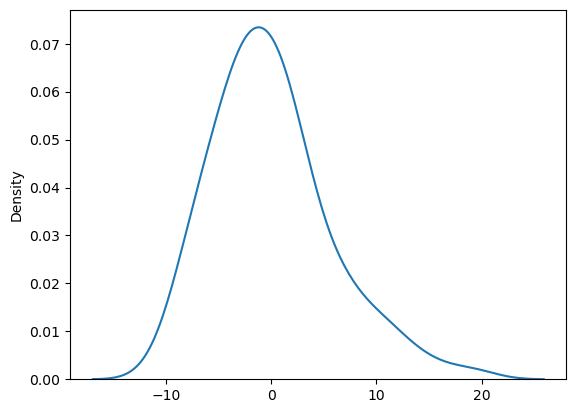

In [20]:
sns.kdeplot(y_test - y_test_pred)

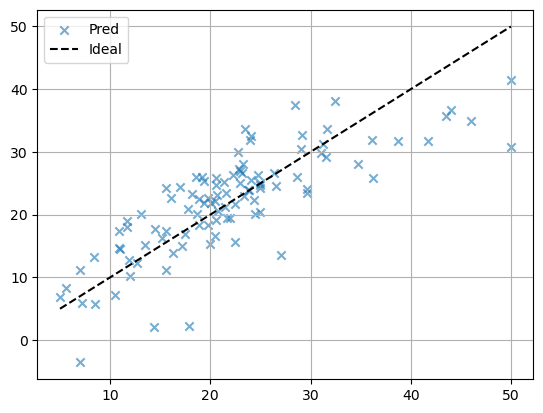

In [21]:
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Pred', marker='x')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal')
plt.legend()
plt.grid(True)